In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns  
import xgboost as xgb
import xgboost
import shap
from sklearn import metrics
from numpy import interp
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, make_scorer, precision_score, brier_score_loss,roc_curve, roc_auc_score, auc, classification_report, precision_recall_curve, f1_score
from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_validate, KFold
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

In [2]:
Data = pd.read_csv('C:/Users/71908/Desktop/CS-AKI/finaldata.csv')

In [3]:
df = Data.drop(columns=['subject_id','Height','Weight','surgery','apsiii','sapsii','input','output','magnesium_level','magnesium_max','aki',
                       'severe_aki_creat','aki_creat','icu_mort','hos_mort','hos_los','icu_los','aki_stage_creat','aki_stage_uo','aki_stage'])
df

,exposure,age,bmi,sex,ethnicity,admission_type,renal_disease,myocardial_infarct,chronic_pulmonary_disease,congestive_heart_failure,...,diabetes,sofa_max,bicarbonate,bun,hemoglobin,sodium,potassium,MAP,Fluid_balance,severe_aki
0,0,57.378803,38.946808,2,3,2,0,1,1,1,...,1,4,23.000000,14.500000,10.766666,138.33333,4.233333,75.479164,63.483173,0
1,1,50.228672,26.095421,1,1,2,0,0,0,0,...,0,5,24.000000,13.000000,11.400000,140.00000,4.200000,76.743591,24.181248,0
2,0,56.299259,26.588749,1,3,2,0,0,1,1,...,0,7,24.500000,18.000000,10.666667,142.00000,5.000000,73.959999,66.309990,0
3,1,66.961601,23.146605,1,3,2,0,0,1,0,...,0,3,26.000000,18.000000,8.866667,139.00000,4.133333,71.517242,79.487091,0
4,1,78.819252,20.160700,1,1,2,0,0,0,0,...,0,4,21.500000,16.500000,9.700000,137.66667,3.900000,69.210526,123.749800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,1,58.980881,21.944252,2,3,1,1,0,0,0,...,0,9,20.333334,10.333333,8.450000,143.00000,4.250000,71.214287,188.652150,0
4988,1,81.725136,32.039871,2,1,1,1,1,0,1,...,0,5,20.000000,14.333333,10.600000,138.00000,4.166666,61.925926,32.495457,1
4989,1,84.800781,28.911566,1,1,2,0,1,0,0,...,0,5,23.000000,12.500000,10.900000,134.50000,5.050000,67.500000,44.662819,1
4990,1,66.088982,34.114956,1,1,2,0,0,0,0,...,1,3,27.000000,17.500000,10.100000,135.00000,4.433333,76.425926,23.708134,0


In [4]:
#Seperate the feature variables (x) and the target variable (y) 
Features = df.loc[:, df.columns != 'severe_aki',]  
y = df['severe_aki'] 

In [5]:
 Features.head() 

,exposure,age,bmi,sex,ethnicity,admission_type,renal_disease,myocardial_infarct,chronic_pulmonary_disease,congestive_heart_failure,...,hypertension,diabetes,sofa_max,bicarbonate,bun,hemoglobin,sodium,potassium,MAP,Fluid_balance
0,0,57.378803,38.946808,2,3,2,0,1,1,1,...,1,1,4,23.0,14.5,10.766666,138.33333,4.233333,75.479164,63.483173
1,1,50.228672,26.095421,1,1,2,0,0,0,0,...,0,0,5,24.0,13.0,11.400000,140.00000,4.200000,76.743591,24.181248
2,0,56.299259,26.588749,1,3,2,0,0,1,1,...,0,0,7,24.5,18.0,10.666667,142.00000,5.000000,73.959999,66.309990
3,1,66.961601,23.146605,1,3,2,0,0,1,0,...,0,0,3,26.0,18.0,8.866667,139.00000,4.133333,71.517242,79.487091
4,1,78.819252,20.160700,1,1,2,0,0,0,0,...,1,0,4,21.5,16.5,9.700000,137.66667,3.900000,69.210526,123.749800


In [6]:
# Standardize Data
from sklearn import preprocessing

standard_data = Features.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,:] = scaler.fit_transform(Features.iloc[:,:])
standard_data
x = pd.DataFrame(standard_data)

In [7]:
####################################### 
#Split Data for Training and Validation 
########################################  
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=13) 
print(x_train.shape[0], x_test.shape[0]) 
print(x_train.shape[1]) 

3494 1498
21


In [8]:
############################################################################ 
#Training dataset accuracy with 10-fold cross-validation using Grid Search 
############################################################################# 

In [9]:
############################################## 
#XGB 
############################################## 

In [10]:
from sklearn.model_selection import GridSearchCV 
xgb = XGBClassifier() 
params = {'colsample_bytree': [0.3, 0.4],'learning_rate': [0.1, 0.01, 0.05], 
'max_depth': range (3, 6, 1), 'alpha': [1,5,10],'gamma':[0.1, 
0.2, 0.3,  0.4]} 
# Grid search object 
grid_search = GridSearchCV(estimator=xgb,param_grid = params, cv = 10, verbose
 =True, scoring='roc_auc') 
# Fit the grid search to the data 
grid_search.fit(x_train, y_train) 

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [11]:
grid_search.best_estimator_ 

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [12]:
 #Fit the regressoor to the training set and make predictions on  the test set 
xgbbest_clf=grid_search.best_estimator_.fit(x_train,y_train) 
xgb_y_pred_prob=xgbbest_clf.predict_proba(x_test)[:,1] 
xgb_y_pred=xgbbest_clf.predict(x_test) 
xgb_roc_auc = roc_auc_score(y_test, xgb_y_pred_prob).round(4) 
xgb_accuracy=accuracy_score(y_test, xgb_y_pred).round(4) 
xgb_f1score = f1_score(y_test, xgb_y_pred, average='binary') 
xgb_precision = precision_score(y_test, xgb_y_pred, labels=[1,2], average='micro') 
xgb_recall = recall_score(y_test, xgb_y_pred, labels=[1,2], average='micro') 
print("xgb_accuracy_score:%.3f, xgb_preci_score:%.3f, xgb_recall_score:%.3f, xgb_f1_score:%.3f, xgb_auc:%.3f"  %(xgb_accuracy, xgb_precision, xgb_recall, xgb_f1score, xgb_roc_auc))

xgb_accuracy_score:0.672, xgb_preci_score:0.684, xgb_recall_score:0.681, xgb_f1_score:0.683, xgb_auc:0.735


In [13]:
#Data for ROC plot  
xgb_fpr, xgb_tpr, xgb_threasholds=roc_curve(y_test, xgb_y_pred_prob)  

In [14]:
#Feature Importance 
pd.DataFrame( 
{ 
'feature_names': x_train.columns, 
'feature_importances': xgbbest_clf.feature_importances_ 
} 
).sort_values( 
'feature_importances', ascending=False 
).set_index(
 'feature_names' 
) 

,feature_importances
feature_names,
congestive_heart_failure,0.156897
renal_disease,0.088449
bmi,0.085971
diabetes,0.071414
bun,0.067322
hypertension,0.050989
liver_disease,0.048466
Fluid_balance,0.047407
ethnicity,0.046032


In [15]:
xgbbest_clf.feature_importances_ 

array([0.03283752, 0.03181466, 0.08597057, 0.03499744, 0.04603245,
       0.01666713, 0.0884488 , 0.02612811, 0.01944981, 0.15689671,
       0.0484661 , 0.05098936, 0.071414  , 0.03358969, 0.0298348 ,
       0.06732192, 0.02458107, 0.02531466, 0.02426504, 0.03757275,
       0.04740739], dtype=float32)

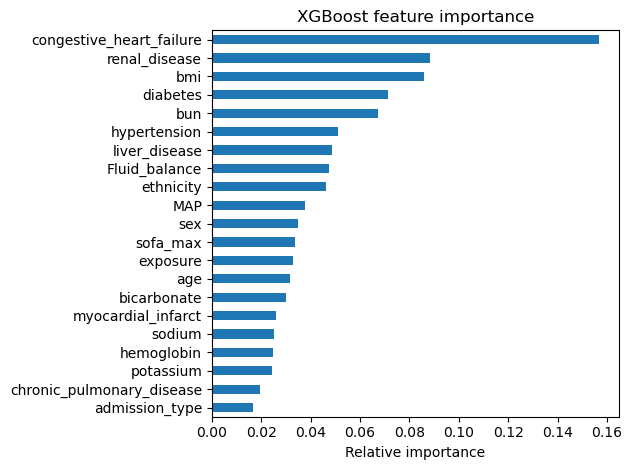

In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline 
feat_importances = pd.Series(xgbbest_clf.feature_importances_, index=x_train.columns) 
feat_importances.nsmallest(22).plot(kind='barh') 
plt.title("XGBoost feature importance", fontsize= 12) 
plt.xlabel('Relative importance', fontsize= 10) 
plt.tight_layout() 
plt.savefig("XGB_FI Test Data4.png",format='png',dpi=2400) 
plt.show() 

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


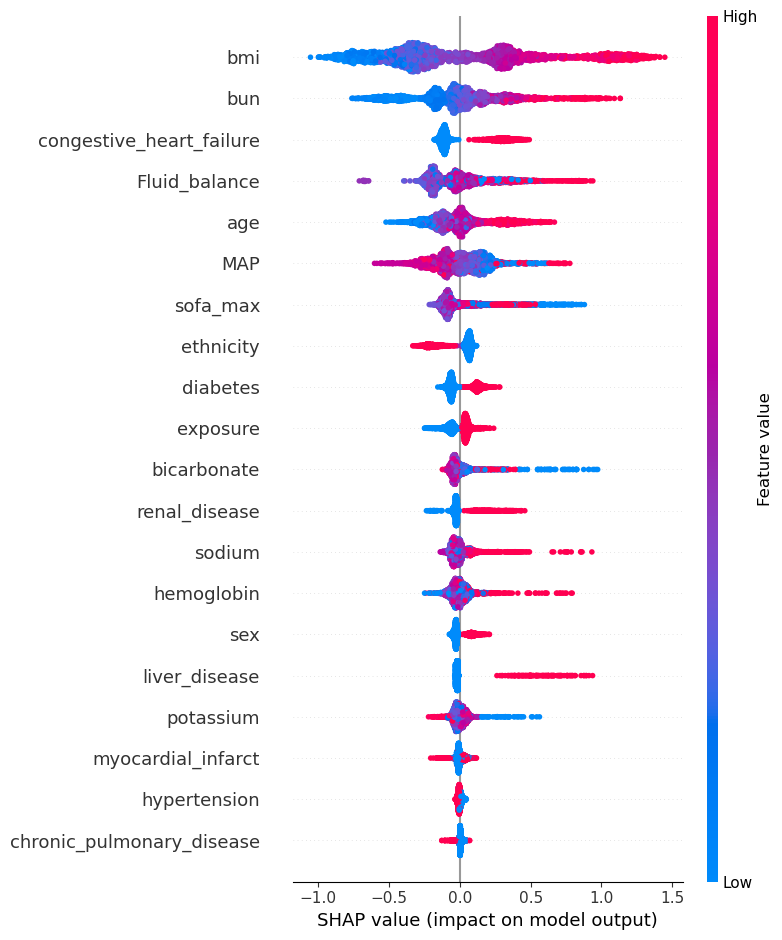

In [17]:
explainer = shap.TreeExplainer(xgbbest_clf)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, show=False)

In [18]:
####################################### 
#Logistic Regression - Ridge Regression 
######################################## 

In [19]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression() 
param_grid = { 
'penalty' : ['l2'], 
'C' : np.logspace(-4, 4,100), 
'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], 
'max_iter':[100000] 
} 
# Grid search object 
grid_search = GridSearchCV(estimator=lr,param_grid = param_grid, cv = 10, verbose=True) 
# Fit the grid search to the data 
grid_search.fit(x_train, y_train) 

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803...
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                         'max_iter': [100000], 'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             verbose=True)

In [20]:
 grid_search.best_estimator_

LogisticRegression(C=0.008697490026177835, max_iter=100000, solver='newton-cg')

In [21]:
#Fit the regressoor to the training set and make predictions on  the test set 
lrbest_clf=grid_search.best_estimator_.fit(x_train,y_train) 
lr_y_pred_prob=lrbest_clf.predict_proba(x_test)[:,1] 
lr_y_pred=lrbest_clf.predict(x_test) 
lr_roc_auc = roc_auc_score(y_test, lr_y_pred_prob).round(4) 
lr_accuracy=accuracy_score(y_test, lr_y_pred).round(4) 
lr_f1score = f1_score(y_test, lr_y_pred, average='binary') 
lr_precision = precision_score(y_test, lr_y_pred, labels=[1,2], average='micro') 
lr_recall = recall_score(y_test, lr_y_pred, labels=[1,2], average='micro') 
print("lr_accuracy_score:%.3f, lr_preci_score:%.3f, lr_recall_score:%.3f, lr_f1_score:%.3f, lr_auc:%.3f"  %(lr_accuracy, lr_precision, lr_recall, lr_f1score, lr_roc_auc)) 

lr_accuracy_score:0.649, lr_preci_score:0.668, lr_recall_score:0.641, lr_f1_score:0.654, lr_auc:0.715


In [22]:
#Data for ROC plot  
lr_fpr, lr_tpr, lr_threasholds=roc_curve(y_test, lr_y_pred_prob)

In [23]:
############################################# 
#Random Forest 
############################################## 

In [24]:
from sklearn.ensemble import RandomForestClassifier 

param_grid = { 
'bootstrap': [True], 
'max_depth': [3, 4, 5,6], 
'max_features': list(range(6,11,1)), 
'min_samples_leaf': [3, 4, 5], 
'min_samples_split': [8, 10, 12], 
'n_estimators': list(range(10,101,10)) 
} 
rf=RandomForestClassifier() 
# Grid search object 
grid_search = GridSearchCV(estimator=rf,param_grid = param_grid, cv = 10, verbose=1) 
# Fit the grid search to the data 
rfbest_clf=grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 1800 candidates, totalling 18000 fits


In [25]:
 grid_search.best_estimator_ 

RandomForestClassifier(max_depth=6, max_features=8, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=70)

In [26]:
 #Mmake predictions on  the test set 
rf_y_pred_prob=rfbest_clf.predict_proba(x_test)[:,1] 
rf_y_pred=rfbest_clf.predict(x_test) 
rf_roc_auc = roc_auc_score(y_test, rf_y_pred_prob).round(4) 
rf_accuracy=accuracy_score(y_test, rf_y_pred).round(4) 
rf_f1score = f1_score(y_test, rf_y_pred, average='binary') 
rf_precision = precision_score(y_test, rf_y_pred, labels=[1,2], average='micro') 
rf_recall = recall_score(y_test, rf_y_pred, labels=[1,2], average='micro') 
print("rf_accuracy_score:%.3f, rf_preci_score:%.3f, rf_recall_score:%.3f, rf_f1_score:%.3f, rf_auc:%.3f"  %(rf_accuracy, rf_precision, rf_recall, rf_f1score, rf_roc_auc)) 

rf_accuracy_score:0.672, rf_preci_score:0.680, rf_recall_score:0.690, rf_f1_score:0.685, rf_auc:0.733


In [27]:
#Data for ROC plot  
rf_fpr, rf_tpr, rf_threasholds=roc_curve(y_test, rf_y_pred_prob)

In [28]:
############################## 
#ROC plot  
############################## 

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


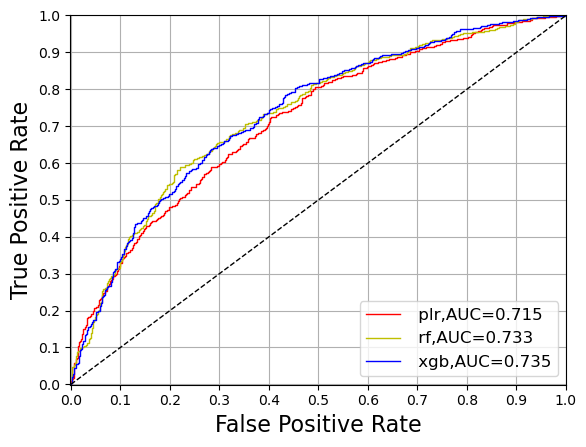

In [29]:
lr_fpr, lr_tpr, lr_threasholds=roc_curve(y_test, lr_y_pred_prob)   
rf_fpr, rf_tpr, rf_threasholds=roc_curve(y_test, rf_y_pred_prob) 
xgb_fpr, xgb_tpr, xgb_threasholds=roc_curve(y_test, xgb_y_pred_prob)  

plt.plot(lr_fpr, lr_tpr,c='r', lw=1, label=u' plr,AUC=%.3f'% lr_roc_auc)  
plt.plot(rf_fpr, rf_tpr,c='y', lw=1, label=u' rf,AUC=%.3f'% rf_roc_auc) 
plt.plot(xgb_fpr, xgb_tpr,c='b', lw=1, label=u' xgb,AUC=%.3f'% xgb_roc_auc) 

plt.plot ((0, 1), (0, 1), c='0', lw=1, ls='--')  
plt.xlim(-0.001, 1.001)  
plt.ylim(-0.001, 1.001)  
plt.xticks(np.arange(0, 1.1, 0.1))  
plt.yticks(np.arange(0, 1.1, 0.1))  
plt.xlabel('False Positive Rate', fontsize= 16)  
plt.ylabel('True Positive Rate', fontsize=16)  
plt.grid (b=True, ls='-')  
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)  
plt.title(u'', fontsize=18)  
plt.savefig('ROC Test Data2.png', dpi=1200)

In [30]:
################################### 
#Precision-Recall Curve 
################################### 

In [31]:
# calculate precision-recall curve 
from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test, xgb_y_pred_prob) 

In [32]:
# calculate precision-recall AUC 
from sklearn.metrics import auc 
auc = auc(recall, precision) 

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


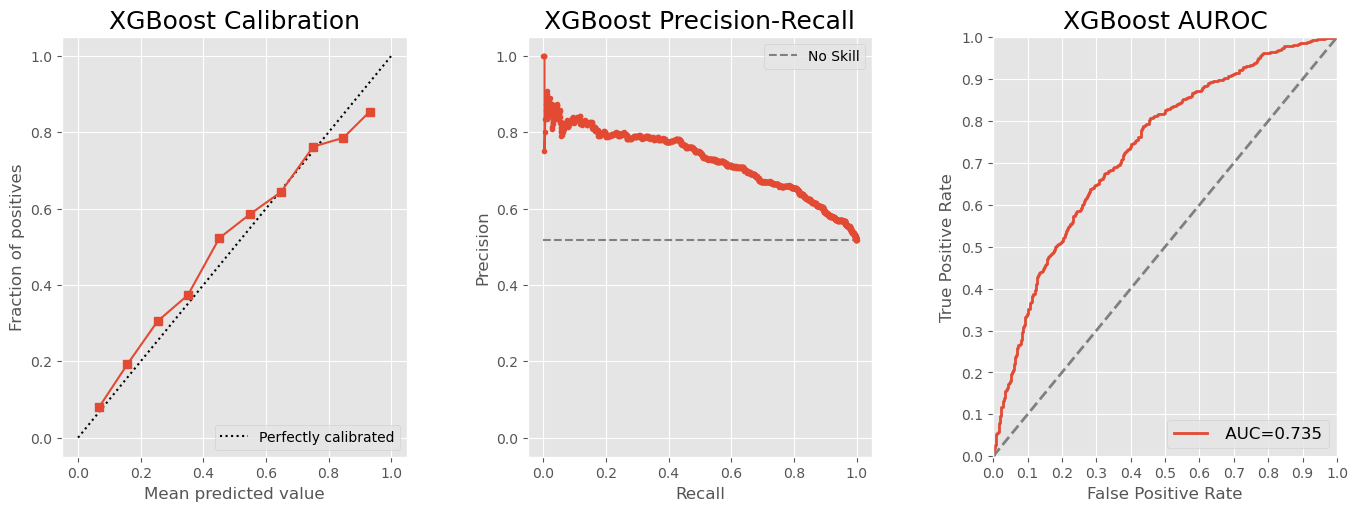

In [46]:
 #4 plots for XGBoost together 
plt.figure(figsize=(15, 5)) 
plt.style.use('ggplot') 

plt.subplot(131) 
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") 
xgb_y_pred_prob = (xgb_y_pred_prob - xgb_y_pred_prob.min()) / (xgb_y_pred_prob.max() - xgb_y_pred_prob.min()) 
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, xgb_y_pred_prob, n_bins=10) 
plt.plot(mean_predicted_value, fraction_of_positives, "s-", 
label=None) 
plt.ylabel("Fraction of positives") 
plt.ylim([-0.05, 1.05]) 
plt.legend(loc="lower right") 
plt.grid (b=True, ls='-')  
plt.title('XGBoost Calibration', fontsize=18) 
plt.xlabel("Mean predicted value", fontsize=12) 

plt.subplot(132) 
no_skill = len(y_test[y_test==1]) / len(y_test) 
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill',c='gray') 
plt.plot(recall, precision, marker='.', label=None) 
plt.xlabel('Recall', fontsize=12) 
plt.ylabel('Precision', fontsize=12) 
plt.grid (b=True, ls='-')  
plt.legend()
 plt.title(u'XGBoost Precision-Recall', fontsize=18)  
plt.ylim([-0.05, 1.05])

plt.subplot(133) 
xgb_fpr, xgb_tpr, xgb_threasholds=roc_curve(y_test, xgb_y_pred_prob) 
plt.plot(xgb_fpr, xgb_tpr, lw=2, label=u' AUC=%.3f'% xgb_roc_auc) 
plt.plot ((0, 1), (0, 1), c='gray', lw=2, ls='--')  
plt.xlim(-0.001, 1.001)  
plt.ylim(-0.001, 1.001)  
plt.xticks(np.arange(0, 1.1, 0.1))  
plt.yticks(np.arange(0, 1.1, 0.1))  
plt.xlabel('False Positive Rate', fontsize= 12)  
plt.ylabel('True Positive Rate', fontsize=12)  
plt.grid (b=True, ls='-')  
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)  
plt.title(u'XGBoost AUROC', fontsize=18)
         
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.savefig('XGBoostAccPlts.png', dpi=1200) 
plt.show() 